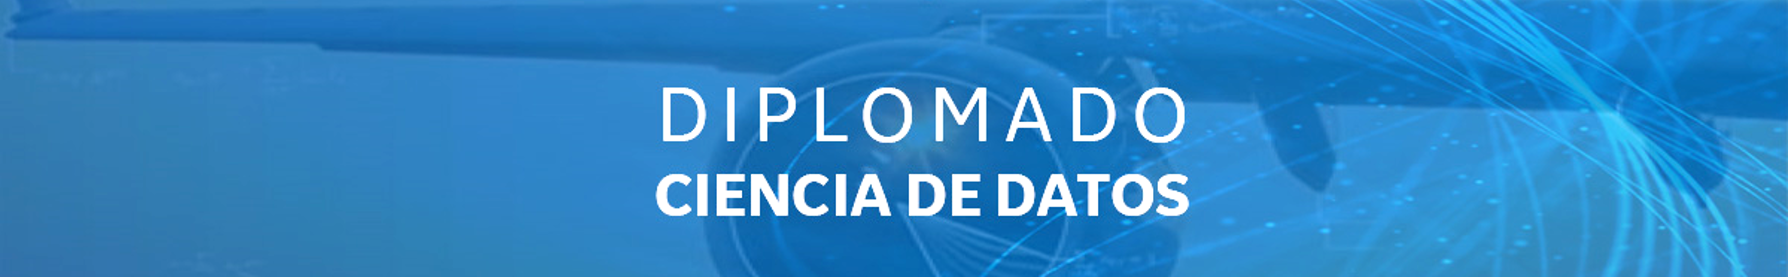

In [1]:
# Cargar Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Hagamos una funcion para generar series

def generar_dispersion(interceptor=0, pendiente=0.5, ruido=10, serie_x=None):
    
    serie_y = []
    
    for x in serie_x:
        y = interceptor + pendiente * x
        
        ruido_valor = random.random() * ruido
        ruido_direccion = random.choice( [-1, 1] )
        
        serie_y.append( y + ruido_direccion * ruido_valor )
    
    
    return serie_y

generar_dispersion(interceptor=0, pendiente=0.5, ruido=10, serie_x=[0, 0, 0])

[2.118118331476888, 9.234840376936926, 6.013290336999731]

In [3]:
# Ejemplo para generar valores de X

serie_x = [x*2 for x in range(20) ]
serie_x

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

<AxesSubplot:xlabel='X', ylabel='Y'>

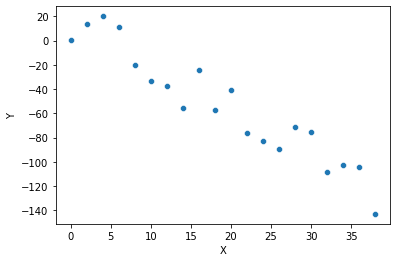

In [4]:
# Hagamos un conjunto de datos

df = pd.DataFrame({
    'X': serie_x,
    'Y': generar_dispersion(interceptor=15.5, pendiente=-3.8, ruido=25, serie_x=serie_x)
})

sns.scatterplot(data=df, y='Y', x='X')

# Función de Costo

Tras definir una **función de costo que nos retorne el _error_ a partir de los parámetros _a_ y _b_**, podremos minimizar el error al ir eligiendo valores (_a_ y _b_) de manera sistemática

Nota: Abordaremos esta minimización del error como si fuese un problema de [optimización matemática](https://es.wikipedia.org/wiki/Optimizaci%C3%B3n_(matem%C3%A1tica))

686.550489822362

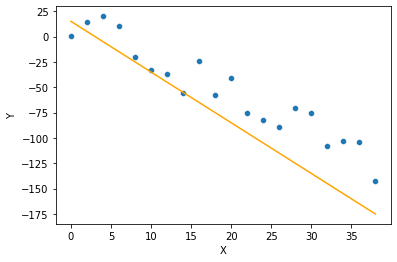

In [5]:
# Definamos nuestra funcion de costo

def funcion_costo(df, a, b, mostrar_plot=False):
    
    vector_x = df['X']
    vector_y = df['Y']
    
    vector_y_hat = a + vector_x * b
    
    if mostrar_plot:
        sns.scatterplot(y=vector_y, x=vector_x)
        sns.lineplot(y=vector_y_hat, x=vector_x, color='orange')
        
    vector_error = vector_y - vector_y_hat
    error_cuadratico_medio = vector_error.mean()
    
    return error_cuadratico_medio * error_cuadratico_medio

funcion_costo(df, 15, -5, True)

In [6]:
# Codigo misterioso

np.linspace(0, 5, 10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [7]:
# Evaluemos nuestra funcion de costos con valores de a y b

valores = []

for a in np.linspace(-10, 10, 10):
    for b in np.linspace(-10, 10, 10):
        
        error = funcion_costo(df, a, b, False)
        
        valores.append([round(a, 2), round(b, 2), round(error, 2)])

df_errores = pd.DataFrame(valores, columns=['a', 'b', 'error'])
df_errores

a      b     error
0  -10.0 -10.00  21375.06
1  -10.0  -7.78  10811.82
2  -10.0  -5.56   3814.01
3  -10.0  -3.33    381.63
4  -10.0  -1.11    514.69
..   ...    ...       ...
95  10.0   1.11   7209.54
96  10.0   3.33  16162.35
97  10.0   5.56  28680.59
98  10.0   7.78  44764.26
99  10.0  10.00  64413.37

[100 rows x 3 columns]

Hagamos una tabla pivote

   * Columnas: Valores de b
   * Renglones: Valores de a
   * Valores: funcion_costo(a, b) [Error]

In [8]:
df_errores_pivote = pd.pivot_table(
    df_errores,
    values='error',
    index=['a'],
    columns=['b'],
    aggfunc=np.sum,
    fill_value=9999
)
df_errores_pivote

b         -10.00    -7.78    -5.56   -3.33    -1.11     1.11      3.33   \
a                                                                         
-10.00  21375.06  10811.82  3814.01  381.63   514.69  4213.18  11477.10   
-7.78   20730.21  10354.62  3544.47  299.75   620.46  4506.60  11958.18   
-5.56   20095.24   9907.30  3284.81  227.74   736.10  4809.90  12449.13   
-3.33   19470.14   9469.86  3035.02  165.61   861.62  5123.08  12949.96   
-1.11   18854.92   9042.30  2795.11  113.35   997.02  5446.13  13460.67   
 1.11   18249.58   8624.61  2565.07   70.97  1142.30  5779.06  13981.25   
 3.33   17654.11   8216.80  2344.92   38.47  1297.45  6121.86  14511.71   
 5.56   17068.52   7818.86  2134.63   15.84  1462.48  6474.55  15052.05   
 7.78   16492.81   7430.80  1934.23    3.09  1637.38  6837.10  15602.26   
 10.00  15926.97   7052.62  1743.70    0.22  1822.16  7209.54  16162.35   

b          5.56      7.78      10.00  
a                                     
-10.00  22306.45  36701.24  54661.45  
-7.78   22975.18  37557.62  55705.49  
-5.56   23653.79  38423.88  56759.41  
-3.33   24342.28  39300.02  57823.20  
-1.11   25040.64  40186.04  58896.87  
 1.11   25748.87  41081.93  59980.42  
 3.33   26466.99  41987.70  61073.84  
 5.56   27194.98  42903.34  62177.14  
 7.78   27932.85  43828.87  63290.32  
 10.00  28680.59  44764.26  64413.37

<AxesSubplot:xlabel='b', ylabel='a'>

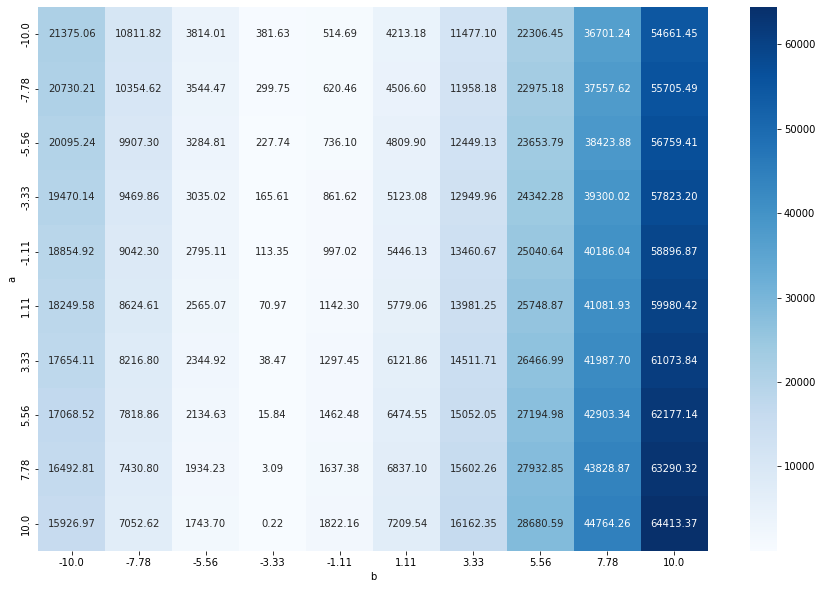

In [9]:
# Visualicemos el error en 2D

plt.figure(figsize=(15, 10))
sns.heatmap( df_errores_pivote, cmap='Blues', annot=True, fmt='.2f')

In [10]:
# Visualicemos el error en 3D

import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Surface(
            z=df_errores_pivote.values,
            x=df_errores_pivote.columns,
            y=df_errores_pivote.index,
            opacity=0.75,
            colorscale='Blues'
        )
    ]
)

fig.update_layout(scene={
    'xaxis_title': 'b',
    'yaxis_title': 'a',
    'zaxis_title': 'error'
})

fig.show()

De acuerdo con las graficas de errores: **¿Que valores de _a_ y _b_ son los mejores?**

0.2786694362438906

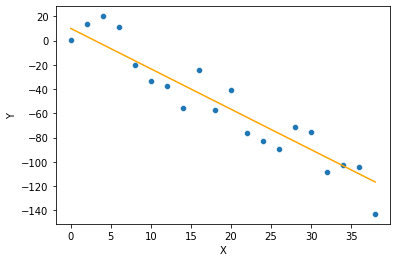

In [12]:
a = 10
b = -3.33

funcion_costo(df, a, b, True)

## Algoritmo de Minimización

Existen muchos algoritmos de optimización en la literatura, todos ellos son de propósito general y hacen converger los valores de la _función de costo_ a las zonas deseadas (Maximizar: Pico más alto, Minimizar: Pico más bajo)

Sin embargo la _regresión lineal_ cuenta con un algoritmo de minimización de error basado en derivadas, que permite ir actualizando los valores de _a_ y _b_ de manera sistemática

In [ ]:
vector_x = df['X']
vector_y = df['Y']

a = 0.0
b = 0.0

L = 0.001
epochs = 1001

n = len(vector_x)

for k in range(epochs):
    
    vector_y_hat = a + vector_x * b
    vector_error = vector_y - vector_y_hat
    
    derivada_a = (-2/n) * sum(vector_error)
    derivada_b = (-2/n) * sum(vector_x * vector_error)
    
    a = a - L * derivada_a
    b = b - L * derivada_b
    
    if k % 100 == 0:
        print('Epoca: %4d, Error: %.3f (ME)' % (k, vector_error.mean()))

error_final = funcion_costo(df, a, b, True)

print('\nResultados')
print('  a:', a)
print('  b:', b)
print('  error_final (MSE):', error_final)

# Discusión: ¿Cómo son las gráficas de errores de una red neuronal?

La gráfica de abajo muestra un ejemplo hipotético de como sería la sábana de error de una red nueronal. En este tipo de sábanas más complejas, se pueden tener varias soluciones.

* ¿Cuáles son las diferencias entre los mínimos locales y el mínimo global?
* ¿Se puede visualizar una sábana de error multidimensional?

In [ ]:
df_gradiente = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

# Invertir Profundidades (Para ejemplificar el problema)
df_gradiente = -df_gradiente
min_value = df_gradiente.min().min()
df_gradiente = df_gradiente + (-min_value)

fig = go.Figure(data=[go.Surface(
    z=df_gradiente.values,
    opacity=0.75,
    colorscale='Blues'
)])

fig.update_layout(scene={
    'xaxis_title': 'b',
    'yaxis_title': 'a',
    'zaxis_title': 'error'
})

fig.show()